In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style= 'darkgrid')

In [2]:
data = pd.read_csv('amazon_laptop_prices_v01.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [3]:
data.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"


In [4]:
data.isnull().sum().sort_values(ascending=False)

cpu_speed               2926
special_features        2392
rating                  2272
graphics_coprocessor    1872
model                   1164
color                    579
harddisk                 576
cpu                      100
graphics                  65
ram                       61
screen_size               29
OS                        26
price                      5
brand                      0
dtype: int64

In [5]:
df = data.copy()

In [6]:
# df["screen_size"] = df["screen_size"].map(lambda x: float(x))
# df["harddisk"] = df["harddisk"].map(lambda x: float(x))
# df["cpu_speed"] = df["cpu_speed"].map(lambda x: float(x))
# df["ram"] = df["ram"].map(lambda x: float(x))
# df["price"] = df["price"].map(lambda x: float(x))

df["screen_size"] = df["screen_size"].str.replace(" ", "", regex=False).str.replace("Inches", "").astype(float)
df["harddisk"] = df["harddisk"].str.replace(" ", "").str.replace("MB", "").str.replace("GB", "").str.replace("TB", "").astype(float)
df["ram"] = df["ram"].str.replace(" ", "").str.replace("MB", "").str.replace("GB", "").str.replace("TB", "").astype(float)
# df["cpu_speed"] = (df["cpu_speed"].str.replace("Hz", "").str.replace(" ", "").str.replace("MHz", "").str.replace("G", "").str.replace("M", "").
#                    str.replace("GHz", "").astype(float))
df["price"] = df["price"].str.replace(",", "").str.replace("$", "").astype(float)


In [7]:
num = df.select_dtypes(exclude= 'O')
cat = df.select_dtypes(include= 'O')

display(num.head())
display(cat.head())

,screen_size,harddisk,ram,rating,price
0,14.00,1000.0,8.0,NaN,589.99
1,15.60,1000.0,64.0,4.5,999.99
2,15.66,NaN,32.0,5.0,1599.00
3,13.30,256.0,8.0,4.8,689.99
4,15.30,256.0,8.0,4.8,1144.48


,brand,model,color,cpu,OS,special_features,graphics,graphics_coprocessor,cpu_speed
0,ROKC,NaN,Blue,Intel Core i7,Windows 11,NaN,Integrated,Intel,1.2 GHz
1,HP,NaN,Silver,Intel Core i5,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN
2,MSI,Vector GP66 12UGS-267,Core Black,Intel Core i9,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz
3,Apple,MacBook Air,Silver,Unknown,Mac OS,Backlit Keyboard,Integrated,NaN,NaN
4,Apple,MacBook Air,Midnight,Unknown,Mac OS,NaN,Integrated,NaN,NaN


In [8]:

for i in df.columns:
    if ((df[i].isnull().sum() / len(df)) * 100).round(2) < 30:
        if df[i].dtypes == 'O':
            df[i].fillna(df[i].mode()[0], inplace = True)
        else:
            df[i].fillna(df[i].median(), inplace = True)
    else:
        df.drop(i, axis = 1, inplace = True)

df.isnull().sum().sort_values(ascending=False)

brand          0
model          0
screen_size    0
color          0
harddisk       0
cpu            0
ram            0
OS             0
graphics       0
price          0
dtype: int64

In [9]:
cleanData = df.copy()

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib


for i in df.drop('price', axis=1).columns:
    if df[i].dtypes != 'O':
        scaler = StandardScaler()
        df[i] = scaler.fit_transform(df[[i]])
        joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb'))
    else:
        encoder = LabelEncoder()
        df[i] = encoder.fit_transform(df[i])
        joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))

df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,graphics,price
0,35,951,-0.908118,21,0.40935,100,-0.920162,31,19,589.99
1,18,951,0.439718,150,0.40935,96,2.329598,35,19,999.99
2,29,951,0.490262,34,-0.23986,107,0.472592,32,6,1599.00
3,4,682,-1.497797,150,-0.58043,139,-0.920162,3,19,689.99
4,4,682,0.186999,101,-0.58043,139,-0.920162,3,19,1144.48


<Axes: >

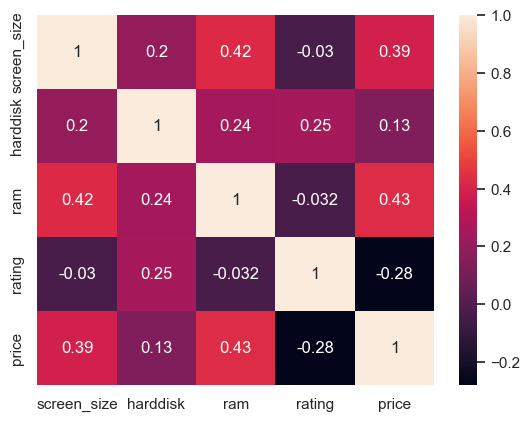

In [11]:
plt.Figure(figsize=(12,3))
sns.heatmap(num.corr(), annot=True)

In [12]:
from sklearn.model_selection import train_test_split

x = df.drop('price', axis= 1)
y = df['price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=40)

training = pd.concat([xtrain, ytrain], axis=1)
testing = pd.concat([xtest, ytest], axis= 1)

In [13]:
# from xgboost import XGBRegressor
# model = XGBRegressor()

# model.fit(xtrain, ytrain)

from sklearn.linear_model import LinearRegression
logModel = LinearRegression()

logModel.fit(xtrain, ytrain)



LinearRegression()

In [14]:
from sklearn.metrics import classification_report

logModel.score(xtest, ytest)

0.32121556970994136

<h3><b>Modelling<hr></h3></b>
<h3> Regression ---------------------------- Classification</h3>
Linear Regression --------------------- Logistic Regression<br>
XGBoost Regressor --------------------- XGBoost Classifier<br>
RandomForest Regressor ---------------- RandomForest Classifier<br>
Decision Tree Reg --------------------- Decision Tree Classifier<br>
K-Nearest Neighbour Reg --------------- k-Nearest Neighbour Classifier<br>
NaiveBayez Regressor ------------------ NaiveBayez   Classifier<br>
LightGBM Regressor -------------------- LightGBM Classifier<br>
CatBoost Regressor -------------------- CatBoost Classifier<br>

In [15]:
from sklearn.ensemble import RandomForestRegressor

randomRgr = RandomForestRegressor(n_estimators=10)

randomRgr.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=10)

In [16]:
print(randomRgr.score(xtest, ytest))

0.746536423906907


In [17]:
joblib.dump(randomRgr, open('LaptopModel.pkl', 'wb'))

In [18]:
from sklearn.metrics import r2_score

valid = randomRgr.predict(xtrain)
print(f"Model performance is: {round(r2_score(ytrain, valid) * 100, 2)}\n")

pred = randomRgr.predict(xtest)
print(f"Model performance is: {round(r2_score(ytest, pred) * 100, 2)}")

Model performance is: 94.98

Model performance is: 74.65


In [19]:
cleanData.harddisk.unique()

array([1.000e+03, 5.120e+02, 2.560e+02, 1.280e+02, 6.400e+01, 1.000e+00,
       1.152e+03, 2.000e+00, 3.200e+01, 1.600e+01, 4.000e+00, 2.400e+02,
       6.500e+01, 1.200e+02, 1.024e+03, 3.000e+02, 3.200e+02, 2.000e+03,
       4.800e+02, 5.000e+02, 2.500e+02, 1.600e+02, 8.000e+00, 4.000e+03,
       1.256e+03, 1.512e+03, 1.920e+00, 1.500e+00, 6.400e+02, 2.048e+03,
       8.000e+03, 6.000e+03, 3.000e+00])

In [20]:
cleanData.to_csv('laptop_price_clean.csv', index=False)

In [21]:
cleanData.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,graphics,price
0,ROKC,Vector GP66 12UGS-267,14.00,Blue,1000.0,Intel Core i7,8.0,Windows 11,Integrated,589.99
1,HP,Vector GP66 12UGS-267,15.60,Silver,1000.0,Intel Core i5,64.0,Windows 11 Pro,Integrated,999.99
2,MSI,Vector GP66 12UGS-267,15.66,Core Black,512.0,Intel Core i9,32.0,Windows 11 Home,Dedicated,1599.00
3,Apple,MacBook Air,13.30,Silver,256.0,Unknown,8.0,Mac OS,Integrated,689.99
4,Apple,MacBook Air,15.30,Midnight,256.0,Unknown,8.0,Mac OS,Integrated,1144.48


In [22]:
xtrain.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,graphics
1403,12,729,-0.908118,15,-0.23986,66,-0.455911,20,104
2492,29,828,0.439718,34,-0.23986,107,0.472592,32,6
1112,12,593,-0.908118,25,-0.58043,66,-0.455911,20,32
3973,12,502,0.439718,15,4.40040,45,2.329598,18,19
4043,12,574,-0.908118,15,-0.58043,66,-0.455911,18,19


In [23]:
lpBrand = "HP"
data.loc[data.brand == lpBrand]["model"].unique()

array([nan, 'Notebook', 'hp laptop', 'Chromebook 14a-na0226nr',
       'TPN-I139_320M3AV', 'i5 12th Gen 15-dy5399nr', 'HP Chromebook',
       'HP Laptop 15-ef2024nr', 'HP', '14-dq0070nr',
       'Chromebook 11 G9 EE', 'HP 15 scarlet red', 'EliteBook 840',
       'HP 14" Chromebook', 'HP 15', 'HP ENVY', 'Pavilion x360',
       'HP Laptop 17-cn0025nr', 'HP 17.3"', 'Chromebook 11a',
       'HP Pavilion', '17-cn0003dx', 'HP Notebook 15-dy1731ms',
       'Pavilion X360', '6M0Z7UA#ABA', 'HP Pavilion x360', 'Chromebook',
       'HP Victus', 'Elitebook 840 G3', '2023 Newest HP 14" Chromebook',
       'EliteBook 655 G9', 'HP ProBook', '1A1L3UA', 'Laptop 15-ef0021nr',
       '15-dy2035tg', 'HP Envy', 'ZBook Firefly 14 G9', 'Pavilion',
       '14a-ca0022nr', '15-eh2085cl', 'AMD Ryzen 5',
       'Victus by HP 15.6 inch Gaming Laptop PC 15-fa1010nr',
       'EliteBook 865 G9', 'Elite Dragonfly G3', '3N8P1UT#ABA',
       'HP Chromebook 11a-na0030nr', 'Dell Precision', 'ZBook Fury G9',
       'HPS13'